In [1]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests

In [40]:
import numpy as np

In [6]:
url="https://in.linkedin.com/jobs/data-analyst-startup-jobs-bengaluru?position={i}&pageNum=0"

In [26]:
HEADERS=({'User_Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36','Accept_Language':'en-us,en;q=0.5'})

In [53]:
webpage=requests.get(url,headers=HEADERS)

In [54]:
webpage

<Response [200]>

In [55]:
soup=BeautifulSoup(webpage.content,"html.parser")

In [56]:
soup.find_all('h4')[0].text.replace("\n"," ").strip()

'Thomson Reuters'

In [25]:
url="https://in.linkedin.com/jobs/data-analyst-startup-jobs-bengaluru?position=2&pageNum=0"

In [149]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://in.linkedin.com/jobs/data-analyst-startup-jobs-bengaluru?position={}&pageNum=0"
all_data = []

for i in range(1, 11):  # Loop through positions 1 to 10
    url = base_url.format(i)
    webpage = requests.get(url).text
    soup = BeautifulSoup(webpage, 'lxml')

    companies = [h4.text.strip() for h4 in soup.find_all('h4')]
    roles = [h3.text.strip() for h3 in soup.find_all('h3')]
    locations = [loc.text.strip() for loc in soup.find_all(class_='job-search-card__location')]
    dates = [date.text.strip() for date in soup.find_all(class_='job-search-card__listdate')]

    # Append data for the current position to all_data list
    all_data.extend(list(zip(companies, roles, locations,dates)))

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data, columns=['Company', 'Role', 'Location','Date'])


In [156]:
df

,Company,Role,Location,Date
0,Thomson Reuters,Data Analyst,"Bengaluru, Karnataka, India",2 weeks ago
1,Jupiter,Data Analyst III,"Bengaluru, Karnataka, India",3 days ago
2,Awign,Data Analyst,"Bengaluru North, Karnataka, India",6 months ago
3,Genpact,Business Analyst - Data Analyst-ANA008094,"Bengaluru, Karnataka, India",2 weeks ago
4,Genpact,Business Analyst - Data Analyst-ANA007931,"Bengaluru, Karnataka, India",5 days ago
...,...,...,...,...
240,"Arena Investors, LP",SQL Developer - Technology,"Bengaluru, Karnataka, India",1 week ago
241,Genpact,"Manager, Business Analyst - Data-ANA009533","Bengaluru, Karnataka, India",2 weeks ago
242,Genpact,Lead Consultant - Jr Python Developer - Data E...,"Bengaluru, Karnataka, India",4 days ago
243,Teamfocus Human Capital Pvt Ltd.,Data & Analytics Lead,"Bangalore Urban, Karnataka, India",1 day ago


In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

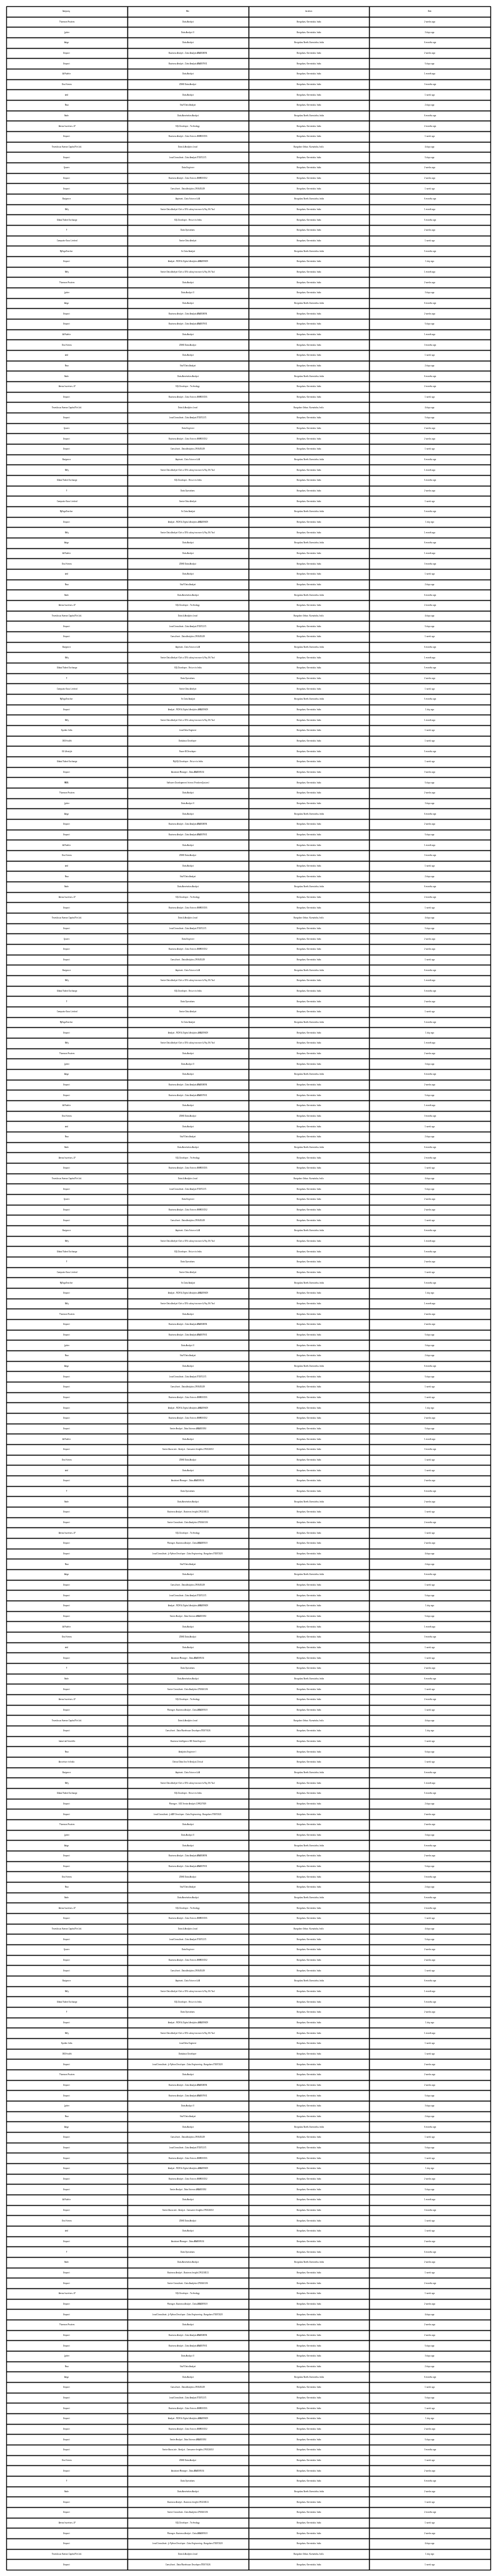

In [155]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

# Save the figure as a PDF
plt.savefig('job_data.pdf', format='pdf', bbox_inches='tight')
plt.show()